### 1. 

On se propose d'implémenter une méthode numérique pour résoudre approximativement une équation de reaction-diffusion avec conditions au bord periodique:

$$ u\in C^2([0,1]),\quad\left\{\begin{aligned}  -u''(x) + sin(2\pi x) u(x) & = \varphi(x) & \forall\, x\in(0,1),\\ u(0) & = u(1). \end{aligned}\right.$$

Pour cela, on passe au Fourier:

$$ u\in C^2([0,1]), \quad  k^2 \widetilde{u}(k) + \frac{1}{2i} \left(\widetilde{u}(k-1) - \widetilde{u}(k+1)\right) = \widetilde{\varphi}(k) \quad \forall\, k \in \mathbb{Z}.$$

Pour resoudre cette equation, on remplace $\widetilde{\varphi}$ par $\widetilde{\varphi}_n(k)$ la transformée de Fourier calculé par quadrature et tronquée à $|k| \leq n$ et resout le systeme des equations finies:

$$ k^2 \widetilde{u}_n(k) + \frac{1}{2i}\left(\widetilde{u}_n(k-1) - \widetilde{u}_n(k+1)\right) = \widetilde{\varphi}_n(k) \quad \forall\, |k| \leq n. \qquad (*)$$

On prendra comme membre de droite la fonction
   $$\varphi(x) = x(1-x).$$

1. Écrire une fonction `fourier_interpolate(n)` qui devra renvoyer un polynome trigonométrique d'ordre $n$, $\widehat{\varphi}_n$, qui interpole $\varphi$ aux nœuds $x_k = \frac{k}{2n+1}$, $k = 0, \dots 2n$:
$$ \widehat{\varphi}_n = \sum_{|k| \leq n} \alpha_k \mathrm{e}^{2\pi i k x}$$
Votre fonction devra aussi renvoyer les coefficients, $\alpha_k$ du polynome trigonométrique.    

In [88]:
using FFTW
using Plots
using LinearAlgebra
using BenchmarkTools

In [ ]:
φ(x) = x*(1-x)
x = LinRange(0, 1, 101)
function fourier_interpolate(u, x)
   """ your code here """ 
end

#dessiner la fonction φ et l'interpolant φ_hat 

2. Écrire $(*)$ sous forme matricelle: $Ax = b$. Écrire une fonction qui renvoit la matrice $A$ et vecteur $b$ pour un $n$ donné. 

In [36]:
function A(n)
    """ your code here """
end
function b(n)
    """ your code here """
end

function get_u_hat(n)
    u_coefs = A(n) \ b(n)
    
    function u_hat(x)
        return real(sum(u_coefs[k+n+1]*exp(2*π*(k*x)*im) for k in -n:n)) #NB: 
    end
end

n = 200
m = 2001
u_hat = get_u_hat(n)
X = LinRange(0, 1, m)
plot(X, u_hat.(X))

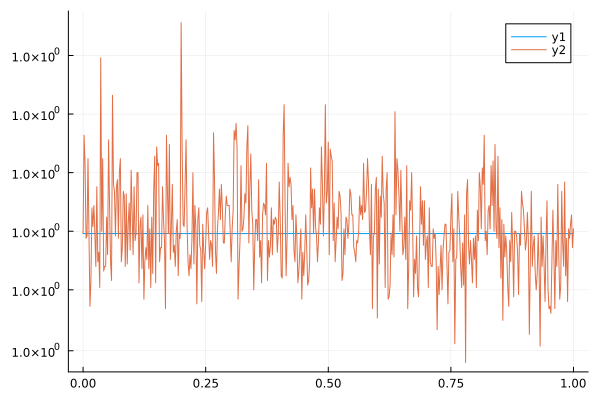

In [173]:
u(x) = 1.
x = LinRange(0, 1, 1001)
function fourier_interpolate(u, x)
    n = Int((length(x)-1)/2)
    b = u.(x)
    A = [exp(2π*(k*t)*im) for t in x, k in -n:n]
    α = A\b
    
    function U(X)
        return real(sum(α[k+n+1]*exp(2*pi*k*X*im) for k in -n:n))
    end
    return U, α
end
X = LinRange(0, 1, 501)
φ_hat, coefs = fourier_interpolate(u, x)
    
plot(X, u.(X))
plot!(X, φ_hat.(X))

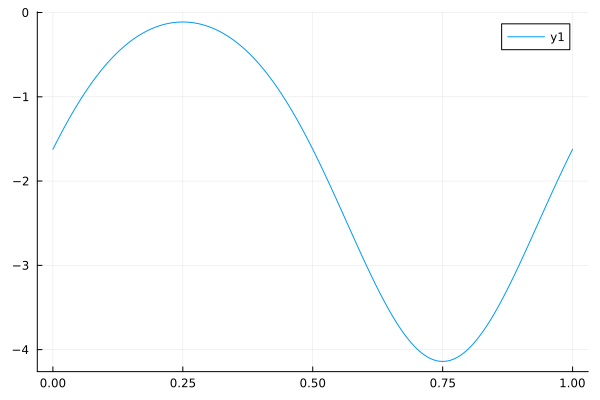

In [174]:
function A(n)
    diag = [k^2 for k in -n:n]
    diag = convert(Vector{ComplexF64}, diag)
    off_diag = (1/(2*im)) .* ones(ComplexF64, 2*n)
    Tridiagonal(off_diag, diag, .-off_diag)
    
end

# function A_sparse(n)
#     diag = [k^2 for k in -n:n]
#     diag = convert(Vector{ComplexF64}, diag)
#     off_diag = (-2π^2 * im) .* ones(ComplexF64, 2*n)
    
#     sparse(Tridiagonal(off_diag, diag, .-off_diag))
    
# end
function b(n)
    x = LinRange(0, 1, 2*n+1)
    φ_hat, coefs = fourier_interpolate(u, x)
    
    return coefs
end

function get_u_hat(n)
    u_coefs = A(n) \ b(n)
    
    function u_hat(x)
        return real(sum(u_coefs[k+n+1]*exp(2*π*(k*x)*im) for k in -n:n))
    end
end
u_hat = get_u_hat(2000)
X = LinRange(0, 1, 201)
plot(X, u_hat.(X))